x_train dtype: float64, Shape: (247, 5)
Iteration    0: Cost  1033.45
Iteration  100: Cost   154.92
Iteration  200: Cost    41.78
Iteration  300: Cost    25.32
Iteration  400: Cost    22.60
Iteration  500: Cost    22.00
Iteration  600: Cost    21.78
Iteration  700: Cost    21.65
Iteration  800: Cost    21.54
Iteration  900: Cost    21.45

Final parameters:
b = 43.86,
w = [-0.35767389 -3.00613964  1.29421557 -9.9650363   0.60955287]


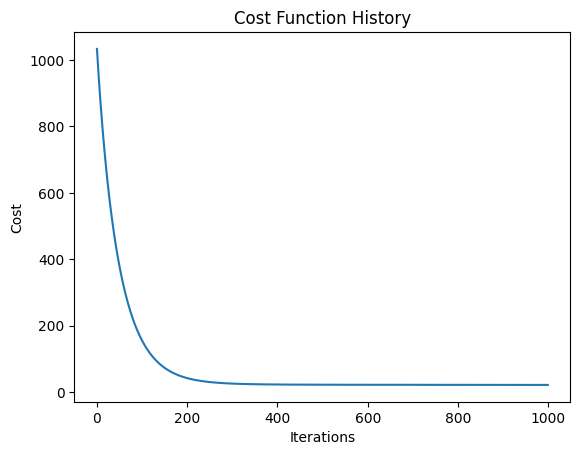


Validation Error: 27.17
R² Score: 0.68

Sample Predictions:
Prediction: 44.20, Target: 39.30
Prediction: 42.79, Target: 38.93
Prediction: 34.41, Target: 40.45
Prediction: 44.78, Target: 41.23
Prediction: 56.59, Target: 71.07
Prediction: 29.97, Target: 37.30
Prediction: 31.65, Target: 37.99
Prediction: 37.65, Target: 40.24
Prediction: 20.39, Target: 9.40
Prediction: 46.69, Target: 40.73


In [10]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
file = pd.read_csv("final.csv")


data = file.dropna().to_numpy()


num_features = data.shape[1] - 1  
X = data[:, :num_features]  
y = data[:, num_features]  

scaler = StandardScaler()
X = scaler.fit_transform(X)

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"x_train dtype: {x_train.dtype}, Shape: {x_train.shape}")

def predict(x, w, b):
    return np.dot(x, w) + b

def compute_cost(x, y, w, b, lambda_):
    m = x.shape[0]
    cost = np.sum((predict(x, w, b) - y) ** 2) / (2 * m)
    reg_term = (lambda_ / (2 * m)) * np.sum(w ** 2)  # with regularization
    return cost + reg_term

def gradient(x, y, w, b, lambda_):
    m, n = x.shape
    dw = np.zeros(n)
    db = 0.0
    
    err = predict(x, w, b) - y
    for j in range(n):
        dw[j] = (np.dot(err, x[:, j]) + lambda_ * w[j]) / m
    
    db = np.sum(err) / m
    return dw, db

def gradient_descent(x, y, w_in, b_in, alpha, iters, lambda_):
    history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(iters):
        dw, db = gradient(x, y, w, b, lambda_)
        w -= alpha * dw
        b -= alpha * db

        cost = compute_cost(x, y, w, b, lambda_)
        history.append(cost)

        if i % (iters // 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost:8.2f}")

    return w, b, history

initial_w = np.zeros(num_features)  
initial_b = 0.0

# Hyperparameters
iterations = 1000
alpha = 0.01  # Learning rate (tuned)
lambda_ = 0.1   # Regularization strength

# Run gradient descent with regularization
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b, alpha, iterations, lambda_)

print(f"\nFinal parameters:\nb = {b_final:.2f},\nw = {w_final}")

# Plot cost function history
plt.plot(J_hist)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function History")
plt.show()

# Evaluate on validation set
y_pred_val = predict(x_val, w_final, b_final)
val_error = np.mean((y_pred_val - y_val) ** 2) / 2
r2 = r2_score(y_val, y_pred_val)

print(f"\nValidation Error: {val_error:.2f}")
print(f"R² Score: {r2:.2f}")

# Make some predictions
print("\nSample Predictions:")
for i in range(min(10, len(x_val))):  # Print first 10 predictions
    pred = predict(x_val[i], w_final, b_final)
    print(f"Prediction: {pred:.2f}, Target: {y_val[i]:.2f}")

# Function for making new predictions with proper scaling
def make_prediction(input_data):
    input_scaled = scaler.transform([input_data])  # Scale the input
    prediction = predict(input_scaled, w_final, b_final)
    return prediction




In [14]:
# Example input data (Replace with actual feature values)
sample_input = [50,20,25,0.5,10]  # Modify based on your dataset

# Ensure the input has the correct number of features
if len(sample_input) != num_features:
    raise ValueError(f"Expected {num_features} features, but got {len(sample_input)}")

# Scale the input data
sample_input_scaled = scaler.transform([sample_input])  # Reshape for scaling

# Make the prediction
sample_prediction = predict(sample_input_scaled, w_final, b_final)

print(f"Predicted Base Points: {sample_prediction[0]:.2f}")

Predicted Base Points: 17.29
